In [1]:
import pandas as pd
import seaborn as sns
import re
from bs4 import BeautifulSoup
import numpy as np

## Requirements
As we're creating a Job Vacancies App our requirements are
1. Links to the twitter Posts
2. Links to the actual websites where the job vacancies are posted
3. The job title
4. The company name
5. User who posted the job
6. Date/Time at which the job is posted
7. Spread Factor(A gradient of how many people are talking about the job) Out of 10, based on retweets, likes and followers
8. Source where the job is posted
9. Text of the Tweet
10. Hashtags used in the tweet
11. Location of the job
12. Verified or Not

In [2]:
df = pd.read_csv('Job_Tweets.csv')
df.head(10)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
5,1211792528388841473,2019-12-30 23:33:47+00:00,HireLive,We are #hiring Inside Sales Representative in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
6,1211791693005099008,2019-12-30 23:30:28+00:00,HireLive,We are #hiring Community Service Counselor in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
7,1211790931772477440,2019-12-30 23:27:26+00:00,HireLive,We are #hiring Outside Sales Representative in...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
8,1211789520473079809,2019-12-30 23:21:50+00:00,PRGWest,We are #hiring Workday HRIS Manager 19-00454 ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",Southern California,False,829,1015
9,1211788232620412929,2019-12-30 23:16:43+00:00,GhLisa,We are #hiring Restaurant Manager - Hourly Man...,"['hiring', 'jobs', 'Laurel']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Mississippi, USA",False,89,80


In [3]:
print(df.columns)
print(df.shape)

Index(['ID', 'Timestamp', 'User', 'Text', 'Hashtag', 'Retweets', 'Likes',
       'Replies', 'Source', 'Location', 'Verified_Account', 'Followers',
       'Following'],
      dtype='object')
(50000, 13)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


<Axes: >

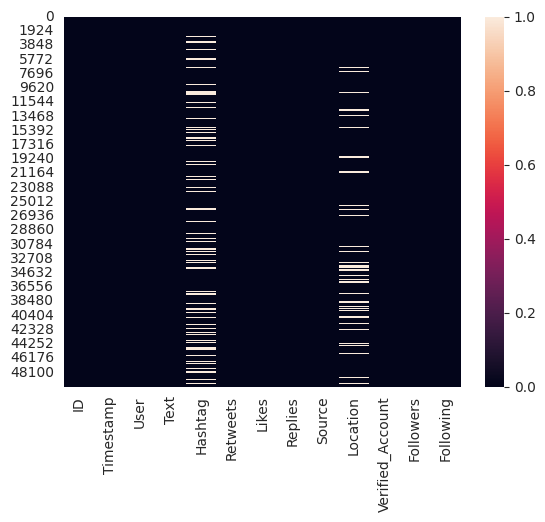

In [5]:
sns.heatmap(df.isnull())

In [6]:
newdf = pd.DataFrame(
    columns=['tlink', 'wlink', 'user', 'datetime', 'spreadfactor', 'hiringchance', 'source', 'text', 'hashtags',
             'location', 'verified'])
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified


In [7]:
newdf['tlink'] = 'https://twitter.com/' + df['User'] + '/status/' + df['ID'].astype(str)
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
0,https://twitter.com/SipapuNM/status/1211798864...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/LorettaOD1/status/12117973...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/guajardo_celina/status/121...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/SteveEckert_OTD/status/121...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/HireLive/status/1211792689...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49995,https://twitter.com/babelsblessing/status/1636...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,https://twitter.com/SSARecruit/status/16363065...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,https://twitter.com/StaffYourDealer/status/163...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,https://twitter.com/StaffYourDealer/status/163...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def extract_links(df, col):
    links = pd.Series(dtype=object)
    for index, row in df.iterrows():
        text = row[col]
        matches = re.findall(r'(https?://[^\s]+)|(www\.[^\s]+)', text)
        if matches:
            link = matches[0]
            links.loc[index] = link
        else:
            links.loc[index] = None
    return links


newdf['wlink'] = extract_links(df, 'Text')
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
0,https://twitter.com/SipapuNM/status/1211798864...,"(https://t.co/imMnymMfwW, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/LorettaOD1/status/12117973...,"(https://t.co/CFAKKQHeFJ, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/guajardo_celina/status/121...,"(https://t.co/XuSMG0eSgs, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/SteveEckert_OTD/status/121...,"(https://t.co/3IGxFiCXUI, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/HireLive/status/1211792689...,"(https://t.co/XAianPE9mX, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49995,https://twitter.com/babelsblessing/status/1636...,"(https://t.co/WG1UTWmsHZ, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,https://twitter.com/SSARecruit/status/16363065...,"(https://t.co/En3UQHu7GO, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/r52DOaqMRS, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/FsVlBkNmmd, )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
newdf['user'] = df['User']
newdf['datetime'] = df['Timestamp']
newdf['text'] = df['Text']
newdf['hashtags'] = df['Hashtag']
newdf['location'] = df['Location']
newdf['verified'] = df['Verified_Account']
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
0,https://twitter.com/SipapuNM/status/1211798864...,"(https://t.co/imMnymMfwW, )",SipapuNM,2019-12-30 23:58:58+00:00,NaN,NaN,NaN,Looking for an exciting job where you can ski ...,NaN,"20 miles SE of Taos, NM",False
1,https://twitter.com/LorettaOD1/status/12117973...,"(https://t.co/CFAKKQHeFJ, )",LorettaOD1,2019-12-30 23:53:02+00:00,NaN,NaN,NaN,Hail in Phoenix - no way! New opportunity at ...,['job'],Arizona,False
2,https://twitter.com/guajardo_celina/status/121...,"(https://t.co/XuSMG0eSgs, )",guajardo_celina,2019-12-30 23:46:41+00:00,NaN,NaN,NaN,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...","Texas, USA",False
3,https://twitter.com/SteveEckert_OTD/status/121...,"(https://t.co/3IGxFiCXUI, )",SteveEckert_OTD,2019-12-30 23:37:04+00:00,NaN,NaN,NaN,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']","Orange County, California",False
4,https://twitter.com/HireLive/status/1211792689...,"(https://t.co/XAianPE9mX, )",HireLive,2019-12-30 23:34:25+00:00,NaN,NaN,NaN,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",United States,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,https://twitter.com/babelsblessing/status/1636...,"(https://t.co/WG1UTWmsHZ, )",babelsblessing,2023-03-16 10:04:39+00:00,NaN,NaN,NaN,We are hiring! 😍\nIf you have experience in pr...,"['projectcoordinator', 'london', 'jobs']","London, England",False
49996,https://twitter.com/SSARecruit/status/16363065...,"(https://t.co/En3UQHu7GO, )",SSARecruit,2023-03-16 10:01:07+00:00,NaN,NaN,NaN,A lovely review from one of our wonderful cand...,"['SSADigital', 'Recruitment', 'Hiring', 'Review']","Innovation Centre, Silverstone",False
49997,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/r52DOaqMRS, )",StaffYourDealer,2023-03-16 09:55:14+00:00,NaN,NaN,NaN,We are #hiring Automotive Service Advisor Writ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False
49998,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/FsVlBkNmmd, )",StaffYourDealer,2023-03-16 09:54:43+00:00,NaN,NaN,NaN,We are #hiring Automotive Sales Consultant in ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False


In [10]:
def extract_source(df, col):
    source = pd.Series(dtype=object)
    for index, row in df.iterrows():
        element = row[col]
        soup = BeautifulSoup(element, 'html.parser')
        a = soup.find('a')
        if a:
            text = a.text.strip()
            source.loc[index] = text
        else:
            source.loc[index] = None
    return source


newdf['source'] = extract_source(df, 'Source')
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
0,https://twitter.com/SipapuNM/status/1211798864...,"(https://t.co/imMnymMfwW, )",SipapuNM,2019-12-30 23:58:58+00:00,NaN,NaN,Instagram,Looking for an exciting job where you can ski ...,NaN,"20 miles SE of Taos, NM",False
1,https://twitter.com/LorettaOD1/status/12117973...,"(https://t.co/CFAKKQHeFJ, )",LorettaOD1,2019-12-30 23:53:02+00:00,NaN,NaN,Jobvite,Hail in Phoenix - no way! New opportunity at ...,['job'],Arizona,False
2,https://twitter.com/guajardo_celina/status/121...,"(https://t.co/XuSMG0eSgs, )",guajardo_celina,2019-12-30 23:46:41+00:00,NaN,NaN,Jobvite,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...","Texas, USA",False
3,https://twitter.com/SteveEckert_OTD/status/121...,"(https://t.co/3IGxFiCXUI, )",SteveEckert_OTD,2019-12-30 23:37:04+00:00,NaN,NaN,ZipRecruiter Post Jobs,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']","Orange County, California",False
4,https://twitter.com/HireLive/status/1211792689...,"(https://t.co/XAianPE9mX, )",HireLive,2019-12-30 23:34:25+00:00,NaN,NaN,ZipRecruiter Post Jobs,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",United States,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,https://twitter.com/babelsblessing/status/1636...,"(https://t.co/WG1UTWmsHZ, )",babelsblessing,2023-03-16 10:04:39+00:00,NaN,NaN,Twitter for iPhone,We are hiring! 😍\nIf you have experience in pr...,"['projectcoordinator', 'london', 'jobs']","London, England",False
49996,https://twitter.com/SSARecruit/status/16363065...,"(https://t.co/En3UQHu7GO, )",SSARecruit,2023-03-16 10:01:07+00:00,NaN,NaN,Buffer,A lovely review from one of our wonderful cand...,"['SSADigital', 'Recruitment', 'Hiring', 'Review']","Innovation Centre, Silverstone",False
49997,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/r52DOaqMRS, )",StaffYourDealer,2023-03-16 09:55:14+00:00,NaN,NaN,ZipRecruiter Post Jobs,We are #hiring Automotive Service Advisor Writ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False
49998,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/FsVlBkNmmd, )",StaffYourDealer,2023-03-16 09:54:43+00:00,NaN,NaN,ZipRecruiter Post Jobs,We are #hiring Automotive Sales Consultant in ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False




spreadfactor is a gradient(from 0 to 10) about how much the tweets have spread. More spreadfactor means it has spread more and the chances of hiring are less
The gradients that define it are Likes, Replies, Retweets, Followers, and Following. 
Likes, Replies, and Retweets have more weightage to the factor, while the other two have less

hiringchance is basically another gradient from 1 to 10 about the hiring chance, the more the hiringchance, the better the chances of getting hired
here the column "Time" is incorporated in as more Time goes by the Hiring Chance Decreases. 
spreadfactor is also incorporated, more the spreadfactor, less are the chances you get hired

In [11]:
def calculate_spreadfactor(row):
    weights = {"Likes": 0.35, "Replies": 0.35, "Retweets": 0.349, "Followers": 0.0005, "Following": 0.0005}
    spreadfactor = sum(row[col] * weights[col] for col in weights.keys())
    return min(max(spreadfactor, 0), 10)


def calculate_hiringchance(row):
    # print(pd.to_datetime(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')))
    # print(pd.to_datetime(pd.to_datetime(row["datetime"]).strftime('%Y-%m-%d %H:%M:%S')))
    time_delta = (pd.to_datetime(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')) - pd.to_datetime(
        pd.to_datetime(row["datetime"]).strftime('%Y-%m-%d %H:%M:%S'))) / pd.Timedelta(days=1)
    hiringchance = 10 - ((time_delta - 1554) * 50) - (row["spreadfactor"] * 0.2)
    # print(hiringchance)
    # return min(max(hiringchance, 1), 10)
    if hiringchance:return hiringchance
    else: return 0


x = df.apply(calculate_spreadfactor, axis=1)
x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))

y = newdf.apply(calculate_hiringchance, axis=1)
y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))




In [12]:
newdf["spreadfactor"] = x_norm
newdf["hiringchance"] = 2*((y_norm * 100000) - 1740)
newdf

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
0,https://twitter.com/SipapuNM/status/1211798864...,"(https://t.co/imMnymMfwW, )",SipapuNM,2019-12-30 23:58:58+00:00,0.21500,NaN,Instagram,Looking for an exciting job where you can ski ...,NaN,"20 miles SE of Taos, NM",False
1,https://twitter.com/LorettaOD1/status/12117973...,"(https://t.co/CFAKKQHeFJ, )",LorettaOD1,2019-12-30 23:53:02+00:00,0.00960,NaN,Jobvite,Hail in Phoenix - no way! New opportunity at ...,['job'],Arizona,False
2,https://twitter.com/guajardo_celina/status/121...,"(https://t.co/XuSMG0eSgs, )",guajardo_celina,2019-12-30 23:46:41+00:00,0.00345,NaN,Jobvite,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...","Texas, USA",False
3,https://twitter.com/SteveEckert_OTD/status/121...,"(https://t.co/3IGxFiCXUI, )",SteveEckert_OTD,2019-12-30 23:37:04+00:00,0.12675,NaN,ZipRecruiter Post Jobs,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']","Orange County, California",False
4,https://twitter.com/HireLive/status/1211792689...,"(https://t.co/XAianPE9mX, )",HireLive,2019-12-30 23:34:25+00:00,0.11170,NaN,ZipRecruiter Post Jobs,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",United States,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,https://twitter.com/babelsblessing/status/1636...,"(https://t.co/WG1UTWmsHZ, )",babelsblessing,2023-03-16 10:04:39+00:00,0.09800,NaN,Twitter for iPhone,We are hiring! 😍\nIf you have experience in pr...,"['projectcoordinator', 'london', 'jobs']","London, England",False
49996,https://twitter.com/SSARecruit/status/16363065...,"(https://t.co/En3UQHu7GO, )",SSARecruit,2023-03-16 10:01:07+00:00,0.63935,NaN,Buffer,A lovely review from one of our wonderful cand...,"['SSADigital', 'Recruitment', 'Hiring', 'Review']","Innovation Centre, Silverstone",False
49997,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/r52DOaqMRS, )",StaffYourDealer,2023-03-16 09:55:14+00:00,0.12870,NaN,ZipRecruiter Post Jobs,We are #hiring Automotive Service Advisor Writ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False
49998,https://twitter.com/StaffYourDealer/status/163...,"(https://t.co/FsVlBkNmmd, )",StaffYourDealer,2023-03-16 09:54:43+00:00,0.12870,NaN,ZipRecruiter Post Jobs,We are #hiring Automotive Sales Consultant in ...,"['hiring', 'jobs', 'Grayling']","Tampa, Florida",False


In [13]:
sorted_df = newdf.sort_values(by='datetime', ascending=False)
sorted_df

,tlink,wlink,user,datetime,spreadfactor,hiringchance,source,text,hashtags,location,verified
40000,https://twitter.com/totalcaretwg/status/164553...,"(https://t.co/3X9RsvTtEx, )",totalcaretwg,2023-04-10 21:00:55+00:00,0.00065,NaN,LaterMedia,WE ARE HIRING! Licensed Practical Nurse (LPN) ...,"['nurse', 'jobs']",NaN,False
40001,https://twitter.com/ultabeautyjobs/status/1645...,"(https://t.co/r7jNUPXHgu, )",ultabeautyjobs,2023-04-10 21:00:45+00:00,0.06790,NaN,CareerArc App,Looking to take your career to the next level ...,"['beautywithoutlimits', 'LuxeBeauty']",NaN,False
40002,https://twitter.com/EEIHR/status/1645532189965...,"(https://t.co/rT8RWlKkj3, )",EEIHR,2023-04-10 21:00:21+00:00,0.10470,NaN,Hootsuite Inc.,"When job seekers apply to online applications,...","['employment', 'jobs', 'hiring']","Manassas, VA",False
40003,https://twitter.com/COHCareers/status/16455321...,"(https://t.co/hOkFKtAbbK, )",COHCareers,2023-04-10 21:00:16+00:00,0.25410,NaN,Hootsuite Inc.,JOB OPENING! WE ARE HIRING! The HOUSTON INFORM...,NaN,"Houston, TX",False
40004,https://twitter.com/nidecsvprobe/status/164553...,"(https://t.co/GMWLipb8QD, )",nidecsvprobe,2023-04-10 20:58:34+00:00,0.01150,NaN,Twitter Web App,We are #hiring! If you are interested in any o...,"['hiring', 'greatplacetowork', 'hiring', 'jobs']","Tempe, Arizona",False
...,...,...,...,...,...,...,...,...,...,...,...
9995,https://twitter.com/FayMRecruitment/status/120...,"(https://t.co/lPkGoX2xwG, )",FayMRecruitment,2019-12-09 18:01:05+00:00,0.25980,NaN,Hootsuite Inc.,We are hiring! Get in touch today info@faymaye...,"['job', 'jobs', 'hiring', 'wearehiring', 'newj...","Stafford, England",False
9996,https://twitter.com/ManpowerCoy/status/1204098...,"(https://t.co/XlM6iFz5Fp, )",ManpowerCoy,2019-12-09 18:00:22+00:00,0.03995,NaN,MightyRecruiter,We are hiring! Click the link below for job de...,NaN,"Fort Worth, TX",False
9997,https://twitter.com/Recruitingplus1/status/120...,"(https://t.co/mwHtf5ebpx, )",Recruitingplus1,2019-12-09 18:00:21+00:00,0.00375,NaN,MightyRecruiter,We are hiring! Click the link below for job de...,NaN,"St Charles, MO",False
9998,https://twitter.com/SmithLatifal/status/120409...,"(https://t.co/CWvvZgSHOG""&gt;https://t.co/CWvv...",SmithLatifal,2019-12-09 18:00:21+00:00,0.02470,NaN,MightyRecruiter,We are hiring! Click the link below for job de...,NaN,Houston Texas,False


In [14]:
sorted_df.to_csv("Finalized-Tweets.csv", index=False)
